<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/CLASE14_PREPROCESAMIENTO_SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nuclio Digital School - Máster en Data Science**
## *Profesora: Raquel Revilla*

## **Preprocessing**: Clase 2 - E.D.A. (Exploratory Data Analysis) + Visualización + Preprocesamiento

En este ejercicio vamos a analizar el dataset de un seguro médico.

Este dataset contiene características de cada una de las personas y el precio que tiene que pagar para obtener dicho seguro.

Vamos a realizar lo siguiente:


1.   **EDA**: Explorar los datos
2.   **Data Cleaning**: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
3.   **Visualization**
4.   **Pre-Processing**

# ¡Vamos a ello!

# 1. Importamos librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

# 2. Conexión con Google Drive y lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_seguro=pd.read_csv("/content/drive/MyDrive/Preprocessing/Preprocessing/dataset_seguros_sin_nulos.csv")

# 3. Estructura de datos

In [ ]:
df_seguro.shape

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
df_seguro.describe()

,EDAD,IMC,PESO,HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,1105.854260
std,14.049960,6.095439,16.389299,1.206345,1009.161649
min,18.000000,15.960000,43.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,5314.000000


# 3. Detección de nulos

In [ ]:
df_seguro.isnull().sum()

EDAD                0
SEXO                0
IMC                 0
PESO                0
HIJOS               0
CIUDAD              0
PRECIO              0
INGRESO_SALARIAL    0
FUMADOR             0
TIPO_COCHE          0
dtype: int64

# 4. Comprobación de duplicados

In [ ]:
df_seguro[df_seguro.duplicated(keep=False)]

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE


**RECORDAD**: El argumento *keep* puede ser:

*   *first*: Marca todos los duplicados como True excepto el primero que aparece
*   *last*: Marca todos los duplicados como True excepto el último que aparece
*   *False*: Marca todos los duplicados como True

# 5. Análisis univariable

In [ ]:
for i in df_seguro.columns:
    print('\n',i,df_seguro[i].unique(),'\n')


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19] 


 SEXO ['MASCULINO' 'FEMENINO'] 


 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.

In [ ]:
for i in df_seguro.columns:
    print('\n',i,df_seguro[i].value_counts(),'\n')


 EDAD 18    69
19    68
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: EDAD, dtype: int64 


 SEXO MASCULINO    678
FEMENINO     660
Name: SEXO, dtype: int64 


 IMC 32.300    13
28.310     9
30.495     8
30.875     8
30.800     8
          ..
40.480     1
26.070     1
24.090     1
28.380     1
44.700     1
Name: IMC, Length: 547, dtype: int64 


 PESO 80     46
75     41
83     35
74     34
78     34
       ..
132     1
46      1
43      1
129     1
123     1
Name: PESO, Length: 89, dtype: int64 


 HIJOS 0    577
1    322
2    239
3    157
4     25
5     18
Name: HIJOS, dtype: int64 


 CIUDAD MADRID       364
SEVILLA      32

# 6. Separamos las variables en: TARGET, CATEGÓRICAS, BOOLEAN Y NUMÉRICAS

Recordamos como estaba estructurado el dataframe!

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
df_seguro2 = df_seguro.copy()

In [ ]:
df_seguro2["FUMADOR_BOOL"]=df_seguro2["FUMADOR"].astype(int)

In [ ]:
del(df_seguro2["FUMADOR"])

In [ ]:
df_seguro2["SEXO_BOOL"]=np.where(df_seguro2["SEXO"]=="MASCULINO",0,1 )

In [ ]:
df_seguro2["SEXO_BOOL"].value_counts()

0    678
1    660
Name: SEXO_BOOL, dtype: int64

In [ ]:
del(df_seguro2["SEXO"])

In [ ]:
df_seguro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   IMC               1338 non-null   float64
 2   PESO              1338 non-null   int64  
 3   HIJOS             1338 non-null   int64  
 4   CIUDAD            1338 non-null   object 
 5   PRECIO            1338 non-null   int64  
 6   INGRESO_SALARIAL  1338 non-null   object 
 7   TIPO_COCHE        1338 non-null   object 
 8   FUMADOR_BOOL      1338 non-null   int64  
 9   SEXO_BOOL         1338 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 104.7+ KB


In [ ]:
df_seguro2.head()

,EDAD,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,80,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,71,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,83,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,64,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,97,0,BARCELONA,1102,MEDIO,AUDI,0,1


In [ ]:
target = ["PRECIO"]

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_seguro2)

In [ ]:
lista_categoricas

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
lista_numericas


['EDAD', 'IMC', 'PESO', 'HIJOS']

In [ ]:
lista_boolean

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
print("Total de variables: ", len(df_seguro2.columns))
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

Total de variables:  10
1 variable a predecir
3 variables categóricas
2 variables boolean
4 variables numéricas


# 7. Lógica de las variables

[[<Axes: title={'center': 'EDAD'}>]]
[[<Axes: title={'center': 'IMC'}>]]
[[<Axes: title={'center': 'PESO'}>]]
[[<Axes: title={'center': 'HIJOS'}>]]


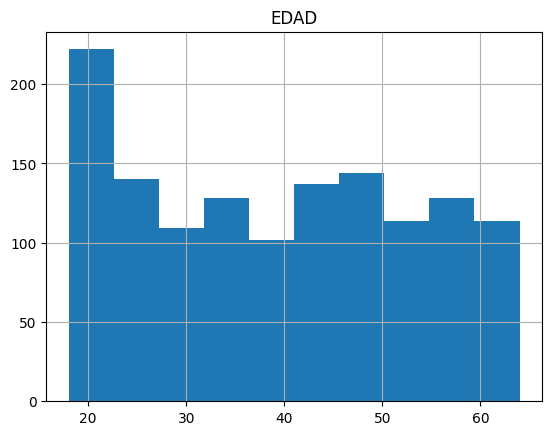

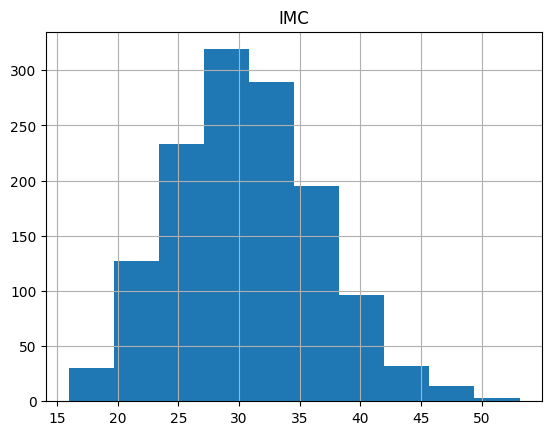

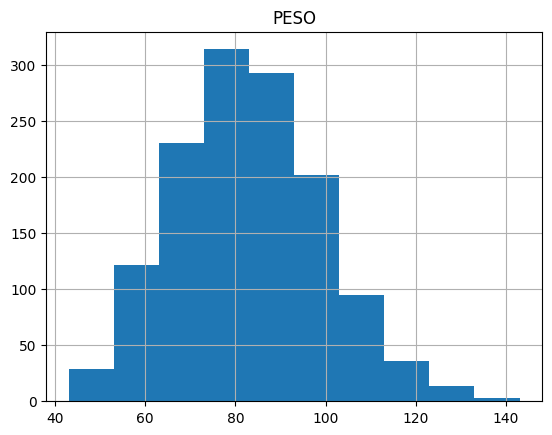

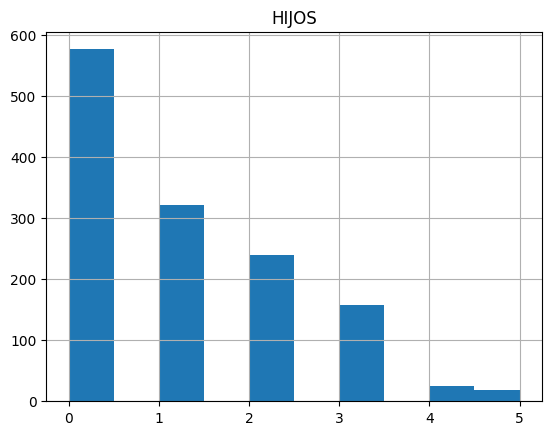

In [ ]:
for i in lista_numericas:
  print(df_seguro2.hist(i))

In [ ]:
for i in lista_categoricas:
  print(df_seguro2.value_counts(i))

CIUDAD
MADRID       364
SEVILLA      325
VALENCIA     325
BARCELONA    324
dtype: int64
INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
dtype: int64
TIPO_COCHE
AUDI         249
SIN COCHE    228
TOYOTA       228
FIAT         213
KIA          210
SEAT         210
dtype: int64


In [ ]:
df_seguro3=df_seguro2.copy()

# 8. Preprocesamiento

## 8.1 Detección de correlación entre variables

Comprobar si hay variables que explican lo mismo

In [ ]:
corr = df_seguro3.corr(numeric_only = True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


Observamos que hay una fuerte correlación entre el peso y el IMC. Por tanto, podemos eliminar cualquiera de las 2 variables.

In [ ]:
del(df_seguro3["PESO"])

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1


## 8.2 Análisis del target

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

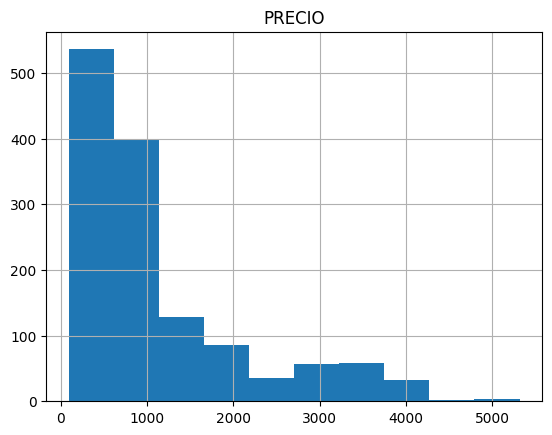

In [ ]:
df_seguro3.hist("PRECIO")

**RECORDAD**: El **diagrama de caja y bigotes** es un tipo de gráfico que muestra un resumen de una gran cantidad de datos en cinco medidas descriptivas, además de intuir su morfología y simetría.

Este tipo de gráficos nos permite identificar valores atípicos y comparar distribuciones.

Se puede detectar rápidamente los siguientes valores:

*   Primer cuartil: el 25% de los valores son menores o igual a este valor
*   Mediana o Segundo Cuartil: Divide en dos partes iguales la distribución. De forma que  el 50% de los valores son menores o igual a este valor
*   Tercer cuartil: el 75% de los valores son menores o igual a este valor
*   Rango Intercuartílico (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.


Las dimensiones de la caja está determinada por la distancia del rango intercuartílico, que es la diferencia entre el primer y tercer cuartil.

El segmento que divide la caja en dos partes es la mediana, que facilitará la comprensión de si la distribución es simétrica o asimétrica.

1.   Si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.
2.   Si la mediana corta la caja en dos lados desiguales se tiene. *Asimetría positiva o segada a la derecha *si la parte más larga de la caja es la parte superior a la mediana. Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana. *Asimetría negativa o sesgada a la izquierda* si la parte más larga es la inferior a la mediana. Los datos se concentran en la parte superior de la distribución. La media suele ser menor que la mediana.

¡Ojo! Porque un lado de la caja sea más largo que otro, no quiere decir que ese lado contenga más datos. Indica un rango más amplio, por lo que los datos estarán mas dispersos. Un rango menos amplio, indica que los datos están más próximos.

La continuación de dos segmentos en la caja se denominan bigotes (whisker) que determina el límite para la detección de valores atípicos.

Los valores atípicos (outilers en inglés) son aquellos puntos que están mas allá del límite inferior o superior.

<Axes: xlabel='PRECIO'>

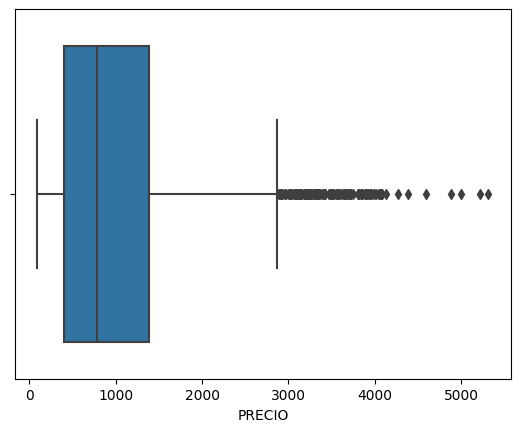

In [ ]:
sns.boxplot(x=df_seguro3["PRECIO"])

Observamos que el precio está afectado por una distribución sesgada a la derecha, por tanto, se recomienda normalizarlo para que siga una distribución normal.

In [ ]:
df_seguro3["LOG_PRECIO"]=np.log10(df_seguro3["PRECIO"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

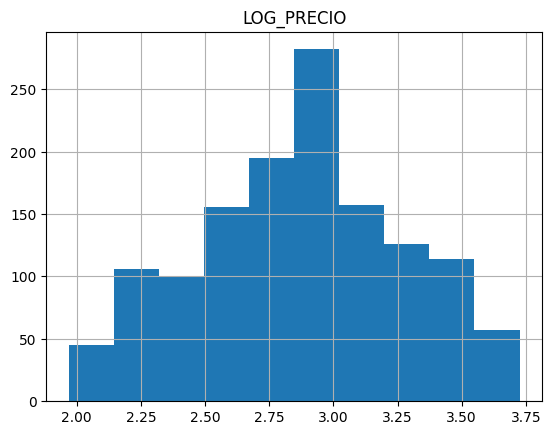

In [ ]:
df_seguro3.hist("LOG_PRECIO")

<Axes: xlabel='LOG_PRECIO'>

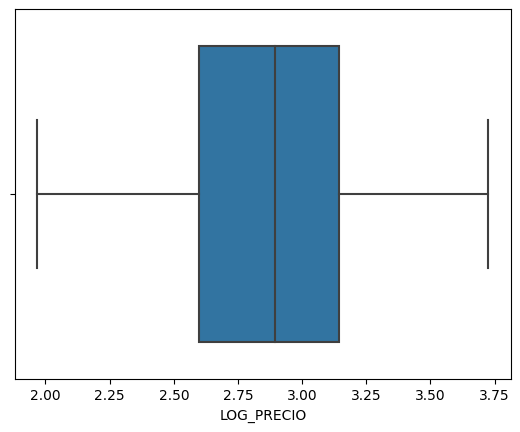

In [ ]:
sns.boxplot(x=df_seguro3["LOG_PRECIO"])

## 8.3 Comparación de variable target vs. variables independientes

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


**RECORDAD**: El violin plot combina la funcionalidad del box plot -mostrando los cuartiles de la distribución- y la de la estimación de densidad kernel. Ésta es una muy buena forma de mostrar la distribución de un conjunto de datos con respecto a una variable categórica.

Seguimos viendo la caja -ahora reducida a una linea negra de cierto grosos en el centro de cada "violin". En el interior de la línea vemos un pequeño punto blanco que representa la mediana y los límites de la línea más gruesa representan los cuartiles Q1 y Q3.

### 8.3.1 Sexo vs Precio

<Axes: xlabel='SEXO_BOOL', ylabel='PRECIO'>

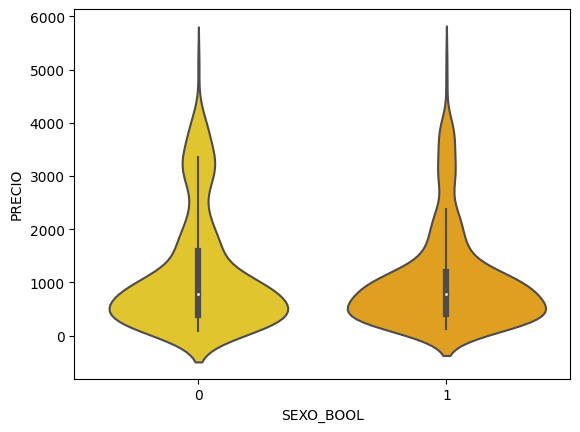

In [ ]:
sns.violinplot(x="SEXO_BOOL",y="PRECIO", data=df_seguro3, palette="Wistia")

### 8.3.2 Fumador vs Precio

<Axes: xlabel='FUMADOR_BOOL', ylabel='PRECIO'>

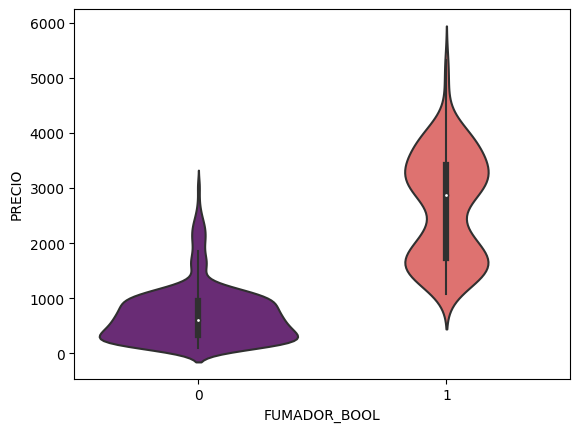

In [ ]:
sns.violinplot(x="FUMADOR_BOOL",y="PRECIO", data=df_seguro3, palette="magma")

**¡OJO!** Por tanto, observamos como el sexo no altera el precio pero, sin embargo, el hecho de ser fumador sí que lo hace.

### 8.3.3 Número de hijos vs Precio

<Axes: xlabel='HIJOS', ylabel='PRECIO'>

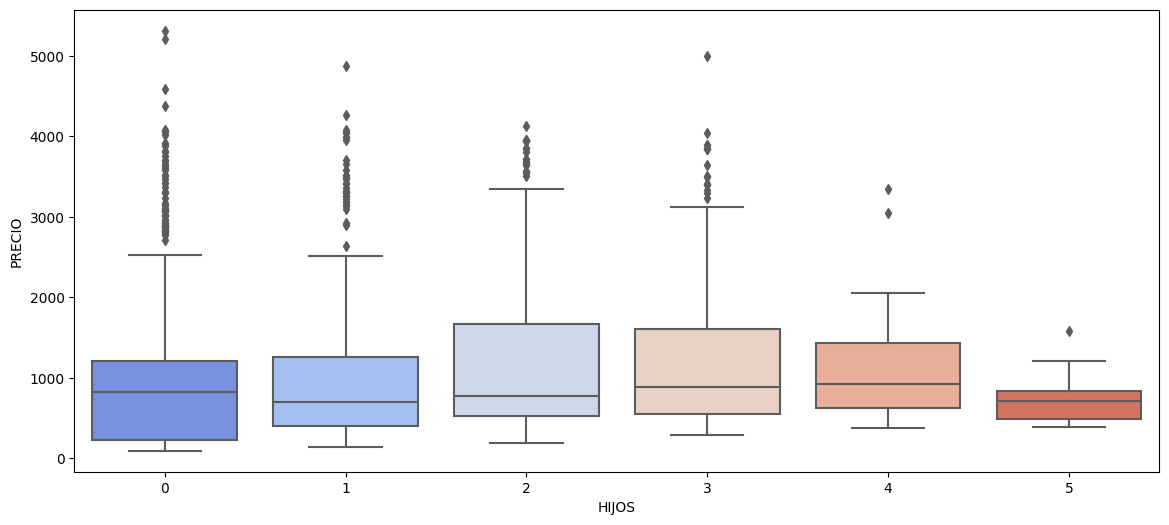

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x="HIJOS",y="PRECIO",  data=df_seguro3, palette="coolwarm")

### 8.3.4 Edad vs Fumador vs Precio

<Axes: xlabel='EDAD', ylabel='PRECIO'>

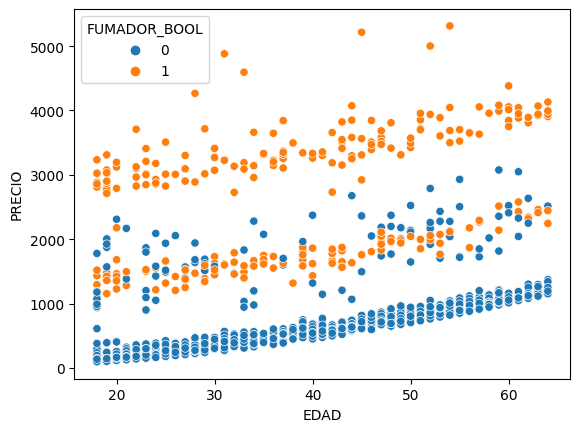

In [ ]:
sns.scatterplot(x="EDAD", y="PRECIO", hue="FUMADOR_BOOL",data=df_seguro3)

### 8.3.5 Ciudad vs Precio

<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

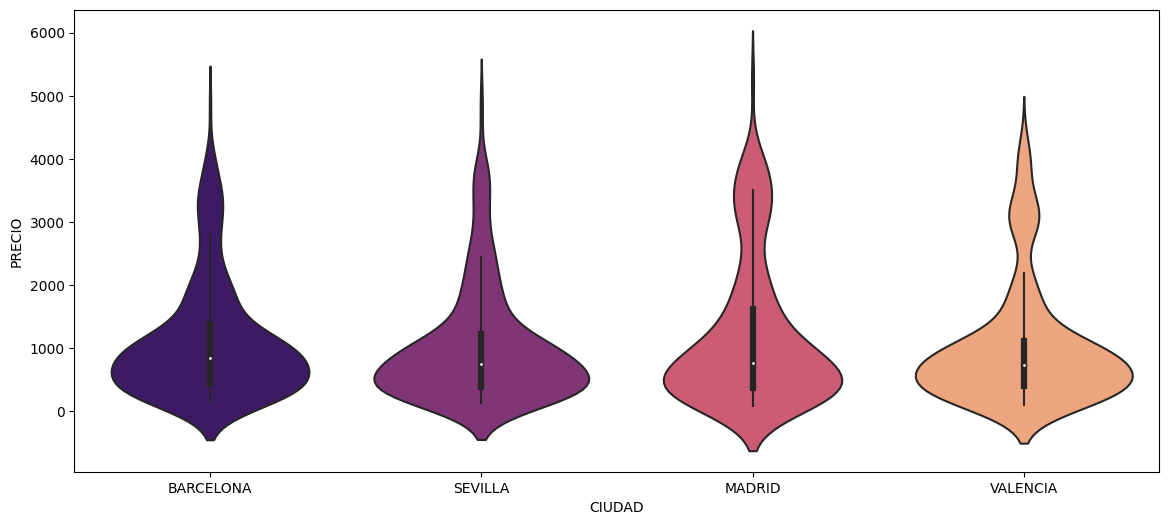

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x="CIUDAD",y="PRECIO", data=df_seguro3, palette="magma")

## 8.4 Escalado de variables

Recordamos que nuestro objetivo es predecir el precio del seguro médico.

Por ello, vamos a utilizar las siguientes estrategias:

*   Label Encoding
*   One Hot Encoding
*   Min max scaling

In [ ]:
df_seguro3.dtypes

EDAD                  int64
IMC                 float64
HIJOS                 int64
CIUDAD               object
PRECIO                int64
INGRESO_SALARIAL     object
TIPO_COCHE           object
FUMADOR_BOOL          int64
SEXO_BOOL             int64
LOG_PRECIO          float64
dtype: object

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


In [ ]:
df_seguro4=df_seguro3.copy()

In [ ]:
target=["PRECIO","LOG_PRECIO"]

In [ ]:
lista_numericas2, lista_boolean2, lista_categoricas2 = obtener_lista_variables(df_seguro4)

In [ ]:
lista_numericas2

['EDAD', 'IMC', 'HIJOS']

In [ ]:
lista_boolean2

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
lista_categoricas2

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

### 8.4.1 Label Encoder

In [ ]:
df_seguro4['INGRESO_SALARIAL'].unique()

array(['ALTO', 'MEDIO', 'BAJO'], dtype=object)

In [ ]:
le = LabelEncoder()
df_seguro4['INGRESO_SALARIAL_INT']= le.fit_transform(df_seguro4['INGRESO_SALARIAL'])

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'].unique()

array([0, 2, 1])

### 8.4.2 Ordinal Encoder

In [ ]:
oe = OrdinalEncoder(categories=[['BAJO','MEDIO','ALTO']])

In [ ]:
oe

OrdinalEncoder(categories=[['BAJO', 'MEDIO', 'ALTO']])

In [ ]:
df_seguro4.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026,2
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243,0
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030,1
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182,2


In [ ]:
df_seguro4["INGRESO_SALARIAL_INT"]=oe.fit_transform(df_seguro4[['INGRESO_SALARIAL']])

In [ ]:
df_seguro4.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541,2.0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026,1.0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243,2.0
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030,0.0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182,1.0


In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'].unique()

array([2., 1., 0.])

Como ya hemos transformado la variables categórica *INGRESO_SALARIAL* a variables numérica, tenemos que eliminarla de la lista de variables categóricas que ya teníamos.

In [ ]:
lista_categoricas2

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
lista_categoricas2.remove("INGRESO_SALARIAL")

In [ ]:
lista_categoricas2

['CIUDAD', 'TIPO_COCHE']

In [ ]:
del(df_seguro4["INGRESO_SALARIAL"])

### 8.4.3 Función: get_dummies

Esta función de pandas crea una columna por cada valor diferente de cada celda, separándolos por el caracter que nosotros especifiquemos y rellena dicha columna con ceros y unos.

In [ ]:
df_seguro5=pd.get_dummies(data=df_seguro4, columns=lista_categoricas2)

In [ ]:
df_seguro5.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,29.830,2,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,25,26.220,0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,52,30.780,1,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,23,23.845,0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,60,36.005,0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_seguro5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   FUMADOR_BOOL          1338 non-null   int64  
 5   SEXO_BOOL             1338 non-null   int64  
 6   LOG_PRECIO            1338 non-null   float64
 7   INGRESO_SALARIAL_INT  1338 non-null   float64
 8   CIUDAD_BARCELONA      1338 non-null   uint8  
 9   CIUDAD_MADRID         1338 non-null   uint8  
 10  CIUDAD_SEVILLA        1338 non-null   uint8  
 11  CIUDAD_VALENCIA       1338 non-null   uint8  
 12  TIPO_COCHE_AUDI       1338 non-null   uint8  
 13  TIPO_COCHE_FIAT       1338 non-null   uint8  
 14  TIPO_COCHE_KIA        1338 non-null   uint8  
 15  TIPO_COCHE_SEAT      

Comprobamos que al crear nuevas variables no hayamos creado nuevas correlaciones.

In [ ]:
corr = df_seguro5.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
EDAD,1.000000,0.107672,0.041946,0.299007,-0.025019,0.020581,0.527839,-0.034009,0.002475,-0.011642,-0.000407,0.010016,-0.020585,-0.023868,-0.001094,-0.023038,0.012002,0.055877
IMC,0.107672,1.000000,0.011162,0.197734,0.003433,-0.048773,0.131753,-0.029758,-0.137105,0.269762,-0.136413,-0.006564,-0.050430,0.018777,-0.029598,0.001865,0.041254,0.019506
HIJOS,0.041946,0.011162,1.000000,0.066241,0.008926,-0.018189,0.159025,0.043323,-0.027177,-0.021534,0.026193,0.023302,0.047950,-0.039947,-0.007335,-0.022669,-0.013121,0.031386
PRECIO,0.299007,0.197734,0.066241,1.000000,0.787255,-0.057284,0.892961,-0.039010,0.006356,0.073979,-0.039910,-0.043210,-0.030941,0.006733,-0.030403,0.043423,0.014121,-0.001241
FUMADOR_BOOL,-0.025019,0.003433,0.008926,0.787255,1.000000,-0.074670,0.665503,-0.014365,0.002811,0.068498,-0.036945,-0.036945,-0.004716,0.027241,-0.030572,0.035618,-0.008328,-0.018179
SEXO_BOOL,0.020581,-0.048773,-0.018189,-0.057284,-0.074670,1.000000,-0.006242,-0.010629,-0.002864,-0.015290,0.012850,0.005878,0.027559,0.016069,0.001695,-0.043511,0.018025,-0.021734
LOG_PRECIO,0.527839,0.131753,0.159025,0.892961,0.665503,-0.006242,1.000000,-0.029511,0.043129,0.015820,-0.017855,-0.041645,-0.004750,0.001984,-0.045566,0.018693,0.005674,0.023310
INGRESO_SALARIAL_INT,-0.034009,-0.029758,0.043323,-0.039010,-0.014365,-0.010629,-0.029511,1.000000,-0.013339,-0.013565,-0.008931,0.036333,0.183252,-0.056815,-0.027327,-0.056676,-0.039472,-0.013659
CIUDAD_BARCELONA,0.002475,-0.137105,-0.027177,0.006356,0.002811,-0.002864,0.043129,-0.013339,1.000000,-0.345561,-0.320177,-0.320177,0.039019,-0.007527,0.043876,0.015098,-0.047380,-0.042740
CIUDAD_MADRID,-0.011642,0.269762,-0.021534,0.073979,0.068498,-0.015290,0.015820,-0.013565,-0.345561,1.000000,-0.346265,-0.346265,-0.042031,0.004838,-0.019068,0.031719,0.049015,-0.022454


In [ ]:
resultado_corr= df_seguro5.corr().unstack().sort_values(ascending = False)

In [ ]:
resultado_corr

EDAD              EDAD               1.000000
CIUDAD_MADRID     CIUDAD_MADRID      1.000000
PRECIO            PRECIO             1.000000
FUMADOR_BOOL      FUMADOR_BOOL       1.000000
SEXO_BOOL         SEXO_BOOL          1.000000
                                       ...   
CIUDAD_BARCELONA  CIUDAD_MADRID     -0.345561
CIUDAD_VALENCIA   CIUDAD_MADRID     -0.346265
CIUDAD_MADRID     CIUDAD_VALENCIA   -0.346265
                  CIUDAD_SEVILLA    -0.346265
CIUDAD_SEVILLA    CIUDAD_MADRID     -0.346265
Length: 324, dtype: float64

In [ ]:
resultado_df= resultado_corr.to_frame().reset_index()

In [ ]:
print(resultado_df[(resultado_df['level_0']!=resultado_df['level_1'])].to_string())

                  level_0               level_1         0
18             LOG_PRECIO                PRECIO  0.892961
19                 PRECIO            LOG_PRECIO  0.892961
20           FUMADOR_BOOL                PRECIO  0.787255
21                 PRECIO          FUMADOR_BOOL  0.787255
22           FUMADOR_BOOL            LOG_PRECIO  0.665503
23             LOG_PRECIO          FUMADOR_BOOL  0.665503
24             LOG_PRECIO                  EDAD  0.527839
25                   EDAD            LOG_PRECIO  0.527839
26                   EDAD                PRECIO  0.299007
27                 PRECIO                  EDAD  0.299007
28          CIUDAD_MADRID                   IMC  0.269762
29                    IMC         CIUDAD_MADRID  0.269762
30                    IMC                PRECIO  0.197734
31                 PRECIO                   IMC  0.197734
32   INGRESO_SALARIAL_INT       TIPO_COCHE_AUDI  0.183252
33        TIPO_COCHE_AUDI  INGRESO_SALARIAL_INT  0.183252
34            

### 8.4.5 Función: MinMaxScaler

In [ ]:
df_seguro6= df_seguro5.copy()

In [ ]:
minMaxResultado=MinMaxScaler()

In [ ]:
lista_numericas2

['EDAD', 'IMC', 'HIJOS']

In [ ]:
df_seguro6[lista_numericas2]=minMaxResultado.fit_transform(df_seguro6[lista_numericas2])

In [ ]:
df_seguro6.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_seguro_final=df_seguro6.copy()

# 9. Guardado del dataset tratado

In [ ]:
pd.to_pickle(df_seguro_final,"/content/drive/MyDrive/Preprocessing/Preprocessing/df_seguro_final_RRB")

In [ ]:
df_recuperacion=pd.read_pickle("/content/drive/MyDrive/Preprocessing/Preprocessing/df_seguro_final_RRB")

In [ ]:
df_recuperacion.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
resultado_df=df_recuperacion.corr().unstack().sort_values(ascending = False)

In [ ]:
resultado_df= resultado_corr.to_frame().reset_index()

In [ ]:
print(resultado_df[(resultado_df['level_0']!=resultado_df['level_1'])].to_string())

                  level_0               level_1         0
18             LOG_PRECIO                PRECIO  0.892961
19                 PRECIO            LOG_PRECIO  0.892961
20           FUMADOR_BOOL                PRECIO  0.787255
21                 PRECIO          FUMADOR_BOOL  0.787255
22           FUMADOR_BOOL            LOG_PRECIO  0.665503
23             LOG_PRECIO          FUMADOR_BOOL  0.665503
24             LOG_PRECIO                  EDAD  0.527839
25                   EDAD            LOG_PRECIO  0.527839
26                   EDAD                PRECIO  0.299007
27                 PRECIO                  EDAD  0.299007
28          CIUDAD_MADRID                   IMC  0.269762
29                    IMC         CIUDAD_MADRID  0.269762
30                    IMC                PRECIO  0.197734
31                 PRECIO                   IMC  0.197734
32   INGRESO_SALARIAL_INT       TIPO_COCHE_AUDI  0.183252
33        TIPO_COCHE_AUDI  INGRESO_SALARIAL_INT  0.183252
34            

# **LISTO PARA APLICAR MODELOS DE MACHINE LEARNING :)**